In [3]:
#visualize tree
def visualize_tree(dt_model, cityname):
    import matplotlib.pyplot as plt
    from sklearn.tree import plot_tree

    plt.figure(figsize=(20, 10))
    plot_tree(dt_model, 
            feature_names=numerical_features, 
            class_names=['aqi'], 
            filled=True, 
            rounded=True, 
            max_depth=3)
    plt.savefig('decision_tree_'+cityname+'.png')
    plt.close()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from joblib import dump
from math import sqrt

def perform_decision_tree_regression(X, y, cityname):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)

    with open('decision_tree_results_' + cityname + '.txt', 'w') as file:
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        explained_variance = explained_variance_score(y_test, y_pred)

        file.write(f"Mean Absolute Error: {mae:.2f}\n")
        file.write(f"Mean Squared Error: {mse:.2f}\n")
        file.write(f"Root Mean Squared Error: {rmse:.4f}\n")
        file.write(f"R^2 Score: {r2:.4f}\n")
        file.write(f"Explained Variance Score: {explained_variance:.4f}\n")

    return dt_model

def removeMissingRows(df, column_names):
    df = df.dropna(subset=column_names)
    return df


In [4]:
cities = ['Bakersfield', 'Los_Angeles', 'New_York', 'Phoenix', 'Reno', 'Visalia', 'Denver', 'Boston']
for city in cities:
    df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')
    numerical_features = ['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_id', 'year', 'month', 'day']
    df = removeMissingRows(df, numerical_features + ['aqi'])  # Include 'aqi' in the check for NaNs
    X = df[numerical_features]
    y = df['aqi']
    dt_model = perform_decision_tree_regression(X, y, city)
    visualize_tree(dt_model, city)
    dump(dt_model, 'decision_tree_model_' + city + '.joblib')
    print(f'Decision tree model and results saved for {city}')

/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5526/2006034242.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Decision tree model and results saved for Bakersfield


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5526/2006034242.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Decision tree model and results saved for Los_Angeles


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5526/2006034242.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Decision tree model and results saved for New_York


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5526/2006034242.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Decision tree model and results saved for Phoenix


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5526/2006034242.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Decision tree model and results saved for Reno
Decision tree model and results saved for Visalia


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5526/2006034242.py:3: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Decision tree model and results saved for Denver


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5526/2006034242.py:3: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_' + city + '.csv')


Decision tree model and results saved for Boston


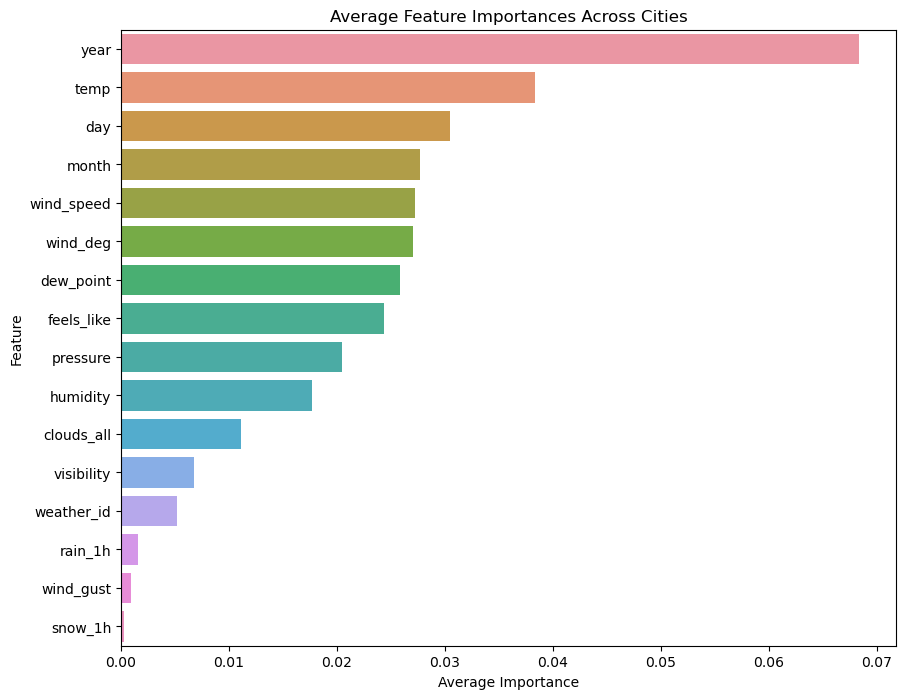

In [4]:
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

cities = ['Bakersfield', 'Los_Angeles', 'New_York', 'Phoenix', 'Reno', 'Visalia', 'Denver', 'Boston']
features = ['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_id', 'year', 'month', 'day']

# Initialize a DataFrame to store feature importances across all cities
importance_data = pd.DataFrame(0, index=np.arange(len(features)), columns=features)

for city in cities:
    # Load the pre-trained decision tree model
    dt_model = load(f'../results/decision_tree/decision_tree_model_{city}.joblib')

    # Get feature importances from the model
    importances = dt_model.feature_importances_

    # Add current city's importances to the total
    importance_data.loc[city] = importances

# Calculate the average importance for each feature across all cities
average_importances = importance_data.mean(axis=0)

# Create a DataFrame from the average importances
average_importances_df = pd.DataFrame({'Feature': features, 'Average Importance': average_importances})

# Sort features by average importance
average_importances_df = average_importances_df.sort_values(by='Average Importance', ascending=False)

# Create a bar plot of average feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Average Importance', y='Feature', data=average_importances_df)
plt.title('Average Feature Importances Across Cities')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.show()
